In [1143]:
#Soru 0
#Veri yüklendi,çalıştırmak için pc'den veri setini seçmeniz gerekli
import pandas as pd 
from google.colab import files
import io
import matplotlib.pyplot as plt
import numpy as np
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

Saving train.csv to train (14).csv


In [1144]:
#Soru 1
#Data'nın büyüklüğü
df.size

10692

In [1145]:
#Soru 2
#İlk 5 satır
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1146]:
#Soru 3
#Data'nın sütunlarındaki veri türleri
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1147]:
#Soru 4
#Hangi sütunda, kaç tane eksik verimiz var onu bulduk
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [1148]:
#Soru 5
#Verimizin count, mean, std. dev, quartile gibi özellikleri
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1149]:
#Soru 6
#Verimizde inconsistent data entry var mı kontrol ettik.
#Verimizde inconsistent veriler bulunuyor.Örneğin Youseff, Mr. Gerious,bu isim bir bu şekilde bir de Yousseff, Mr. Gerious bu şekilde olmak üzere 2 kez yazılmış.
df_name = df['Name'].unique()#Burada bunun tespitini sağladık
df_name.sort()#Tespit için sıralama yaptık
df_name

array(['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore Edward',
       'Abbott, Mrs. Stanton (Rosa Hunt)', 'Abelson, Mr. Samuel',
       'Abelson, Mrs. Samuel (Hannah Wizosky)',
       'Adahl, Mr. Mauritz Nils Martin', 'Adams, Mr. John',
       'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
       'Aks, Mrs. Sam (Leah Rosen)', 'Albimona, Mr. Nassef Cassem',
       'Alexander, Mr. William', 'Alhomaki, Mr. Ilmari Rudolf',
       'Ali, Mr. Ahmed', 'Ali, Mr. William',
       'Allen, Miss. Elisabeth Walton', 'Allen, Mr. William Henry',
       'Allison, Master. Hudson Trevor', 'Allison, Miss. Helen Loraine',
       'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
       'Allum, Mr. Owen George',
       'Andersen-Jensen, Miss. Carla Christine Nielsine',
       'Anderson, Mr. Harry', 'Andersson, Master. Sigvard Harald Elias',
       'Andersson, Miss. Ebba Iris Alfrida',
       'Andersson, Miss. Ellis Anna Maria',
       'Andersson, Miss. Erna Alexandra',
       'Andersson, Miss. Ingeborg Con

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

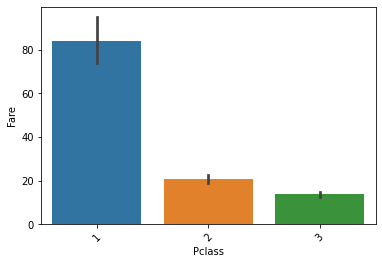

In [1150]:
#Soru 7
#Sınıf-Ücret Grafiği
#Sınıf seviyesi ne kadar üstse fiyat da bir o kadar pahalı
import seaborn as sns
ax=sns.barplot(x='Pclass',y='Fare',data=df )
plt.xticks(rotation=45)#x ekseni değerlerini 45 derecelik açıyla bastırdık

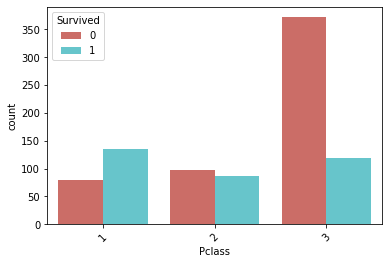

In [1151]:
#Soru 7
#(hayatta olan ve olmayanlara göre ayrılmış) Sınıf-Sınıfa ait kişi sayısı Grafiği
#Sınıf kötüleştikçe ölümler artmış
sns.countplot(x='Pclass', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

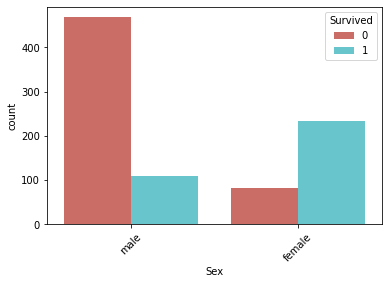

In [1152]:
#Soru 7
#(hayatta olup olmamaya göre ayrılmış)gemideki cinsiyetlerin sayısı
#Gemiye binen ve ölen erkek sayısı kadınlara göre daha fazla
sns.countplot(x='Sex', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

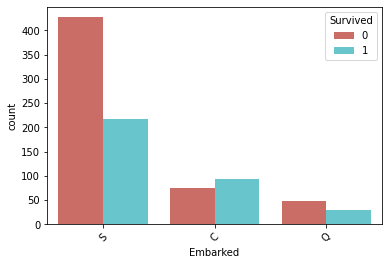

In [1153]:
#Soru 7
#(hayatta olup olmamaya göre ayrılmış)farklı limanlardan binen kişi sayıları
# S = Southampton'dan binen kişi sayısı daha fazladır. Ayrıca buradan binip ölen insan sayısı da daha fazladır.
sns.countplot(x='Embarked', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

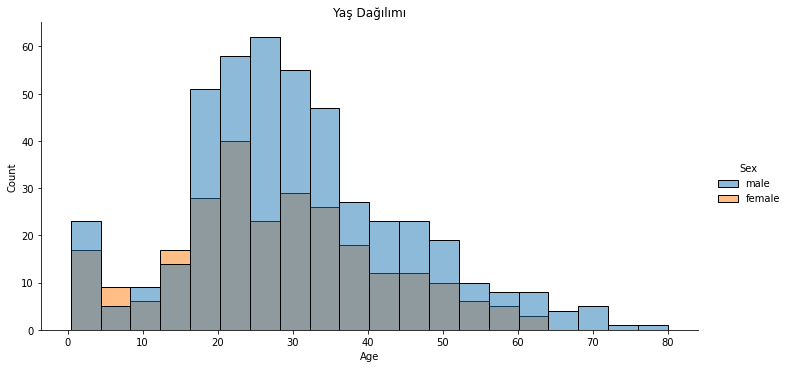

In [1154]:
#Soru 7
#Cinsiyet ayrımına göre yaş dağılım grafiği
#Gemiye binen erkek sayısı daha fazladır ve kadınlara göre erkeklerin yaş sınırı daha geniştir.
sns.displot(data=df, x='Age', hue='Sex', aspect=2.0)
plt.title('Yaş Dağılımı');

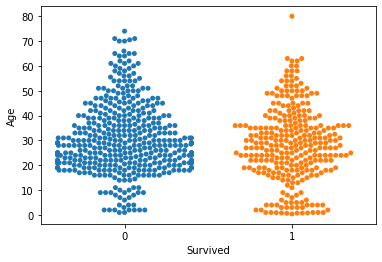

In [1155]:
#Soru 7
#Hayatta kalanlar ve kalmayanlara göre  ayrılmış yaş dağılımı
#Küçük yaşta ölenler fazla değil,20-40 yaş aralığında ölümlerde ciddi bir artış olmuş,yaşlılarda ölüm oranı sağ kalanlara nispeten daha fazla
sns.swarmplot(x=df['Survived'], y=df['Age'])

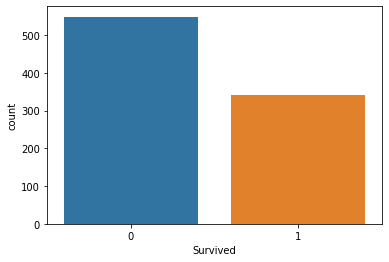

In [1156]:
#Soru 7
#Ölüm sayısı yaşayanlardan daha fazla,ölüm sayısı 500'ü aşmış
sns.countplot(df['Survived'])

In [1157]:
#Soru 8
#Eksik verilerimiz için gerekli imputationları yaptık
#NaN değerleri 0'la doldurduk.
df=df.fillna(0)

In [1158]:
#Soru 9
#Büyük-Küçük harf uyuşmazlığından ve arada boşluklar önemsenmeden yazılan isimler için ilk başta düzenlemeler yapıldı.
df['Name'] = df['Name'].str.lower()#Kelimelenin bütün harfleri küçük harflerle yazılmış hale çevrildi
df['Name'] = df['Name'].str.strip()#Boşlukları kaldırıldı.

In [1159]:
#Soru 9
#yaptığımız işlemler işe yaradı mı kontrol ettik
df_name = df['Name'].unique()
df_name.sort()
df_name

array(['abbing, mr. anthony', 'abbott, mr. rossmore edward',
       'abbott, mrs. stanton (rosa hunt)', 'abelson, mr. samuel',
       'abelson, mrs. samuel (hannah wizosky)',
       'adahl, mr. mauritz nils martin', 'adams, mr. john',
       'ahlin, mrs. johan (johanna persdotter larsson)',
       'aks, mrs. sam (leah rosen)', 'albimona, mr. nassef cassem',
       'alexander, mr. william', 'alhomaki, mr. ilmari rudolf',
       'ali, mr. ahmed', 'ali, mr. william',
       'allen, miss. elisabeth walton', 'allen, mr. william henry',
       'allison, master. hudson trevor', 'allison, miss. helen loraine',
       'allison, mrs. hudson j c (bessie waldo daniels)',
       'allum, mr. owen george',
       'andersen-jensen, miss. carla christine nielsine',
       'anderson, mr. harry', 'andersson, master. sigvard harald elias',
       'andersson, miss. ebba iris alfrida',
       'andersson, miss. ellis anna maria',
       'andersson, miss. erna alexandra',
       'andersson, miss. ingeborg con

Soru 9:
Eklentilerimizin çalışması için bazı indirme ve yüklemeler yaptık.

In [1160]:
pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org pip --upgrade --user 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1161]:
pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1162]:
#Soru 9
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

In [1163]:
#Soru 9
#uyuşan verileri sağlayan sütunlardaki satırları verdiğimiz orana göre değiştirme fonksiyonu
def replace_matches_in_column(df, column, string_to_match, min_ratio = 90):
    # get a list of unique strings
    strings = df[column].unique()
    
   # "..."ile en yakın 10 eşleşmeyi bul("Yousseff, Mr. Gerious" )
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # sadece oranı > 90 olan eşleşmeleri alın
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # veri çerçevemizdeki tüm yakın eşleşmelerin satırlarını alın
    rows_with_matches = df[column].isin(close_matches)

    # tüm satırları yakın eşleşmelerle giriş eşleşmeleriyle değiştir
    df.loc[rows_with_matches, column] = string_to_match
    print("All done!")

In [1164]:
#Soru 9
#fonksiyonumuzu çağırdık ve Yousseff, Mr. Gerious ismini düzelttik
replace_matches_in_column(df=df, column='Name', string_to_match="Yousseff, Mr. Gerious")

All done!


In [1165]:
#Soru 9
#Verimiz düzelmiş mi diye kontrol için tekrar eşsiz değerleri sıralayıp bastırdık.
df_name = df['Name'].unique()
df_name.sort()
df_name

array(['Yousseff, Mr. Gerious', 'abbing, mr. anthony',
       'abbott, mr. rossmore edward', 'abbott, mrs. stanton (rosa hunt)',
       'abelson, mr. samuel', 'abelson, mrs. samuel (hannah wizosky)',
       'adahl, mr. mauritz nils martin', 'adams, mr. john',
       'ahlin, mrs. johan (johanna persdotter larsson)',
       'aks, mrs. sam (leah rosen)', 'albimona, mr. nassef cassem',
       'alexander, mr. william', 'alhomaki, mr. ilmari rudolf',
       'ali, mr. ahmed', 'ali, mr. william',
       'allen, miss. elisabeth walton', 'allen, mr. william henry',
       'allison, master. hudson trevor', 'allison, miss. helen loraine',
       'allison, mrs. hudson j c (bessie waldo daniels)',
       'allum, mr. owen george',
       'andersen-jensen, miss. carla christine nielsine',
       'anderson, mr. harry', 'andersson, master. sigvard harald elias',
       'andersson, miss. ebba iris alfrida',
       'andersson, miss. ellis anna maria',
       'andersson, miss. erna alexandra',
       'ande

In [1166]:
#Soru 10
# convert to cateogry dtype
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes

# convert to category codes
df['Embarked'] = df['Embarked'].astype('category')
df['Embarked'] = df['Embarked'].cat.codes

In [1167]:
#Soru 11
#kullanmayacağımız değişkenleri bıraktık.
df = df.drop(['Cabin', 'Ticket','Name', 'PassengerId'], axis=1)
combine = [df]

In [1168]:
#Soru 11
#Aile büyüklüğünü aile ilişkilerine ait verilerle bulduk
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)#aile büyüklüklerine göre gruplanmış ortalama hayatta kalma olasılığı

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [1169]:
#Soru 11
df["Age"] = df["Age"].fillna(-0.5)#NaN değerleri olmayan bir değerle doldurduk

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]#bölüceğimiz sınırları belirledik
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']#böleceğimiz başlık değerlerini verdik
df['AgeGroup'] = pd.cut(df["Age"], bins, labels = labels)#verimizi böldük ve ayrı bir sütuna koyduk


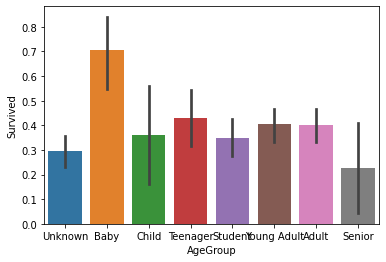

In [1170]:
#Soru 11
sns.barplot(x="AgeGroup", y="Survived", data=df)#bölünen veriyi hayatta kalıp kalmamaya bağlı olarak çizdirdik.
plt.show()

In [1171]:
#Soru 11
title_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
#gruplanan yaş değerlerini nümerik sayılara çevirdik
for dataset in combine:
    dataset['AgeGroup'] = dataset['AgeGroup'].map(title_mapping)
    dataset['AgeGroup'] = dataset['AgeGroup'].fillna(0)

In [1172]:
#Soru 11
#Yaş değerlerini nümerik sayıya çevirdik
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']=4
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,AgeGroup
0,0,3,1,1.0,1,0,7.2500,3,2,4.0
1,1,1,0,2.0,1,0,71.2833,1,2,6.0
2,1,3,0,1.0,0,0,7.9250,3,1,5.0
3,1,1,0,2.0,1,0,53.1000,3,2,5.0
4,0,3,1,2.0,0,0,8.0500,3,1,5.0


In [1173]:
#Soru 12
X = df.copy()#datayı x'e kopyaladık.
y = X.pop("Survived")#hedef değişkeni ayırdık

# Kategoriler için etiket kodladık
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# Tüm ayrık özellikler tamsayı türüne sahip olmalıdır
discrete_features = X.dtypes == int
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,AgeGroup
0,0,3,1,1.0,1,0,7.2500,3,2,4.0
1,1,1,0,2.0,1,0,71.2833,1,2,6.0
2,1,3,0,1.0,0,0,7.9250,3,1,5.0
3,1,1,0,2.0,1,0,53.1000,3,2,5.0
4,0,3,1,2.0,0,0,8.0500,3,1,5.0


In [1174]:
#Soru 12
from sklearn.feature_selection import mutual_info_regression
# Mutual information skorlar için fonksiyon tanımladık
# gerçek değerli hedefler için (mutual_info_regression)
# özelliklerimiz için MI puanlarını hesaplar ve bunları bir veri çerçevesinde toplar.
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
#fonksiyon çağırıldı
mi_scores = make_mi_scores(X, y, discrete_features)
print(mi_scores)

Sex           0.150071
Fare          0.127271
Embarked      0.070311
Pclass        0.064192
FamilySize    0.045877
SibSp         0.042056
Parch         0.003581
Age           0.000000
AgeGroup      0.000000
Name: MI Scores, dtype: float64


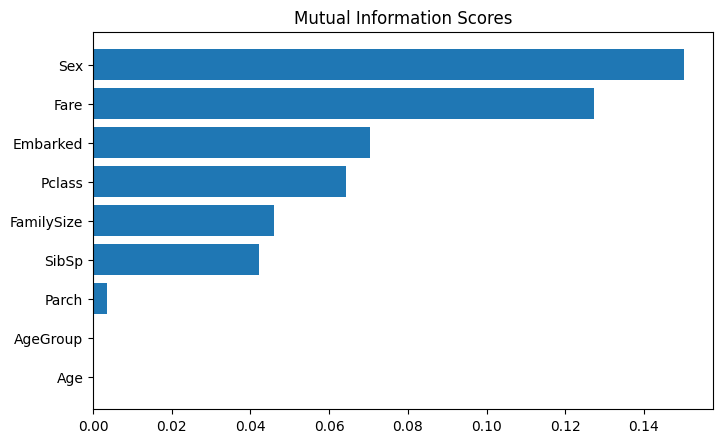

In [1175]:
#Soru 12
#Çizimin şekline dair bilgi verildi
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

#Tablo çizdirildi
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

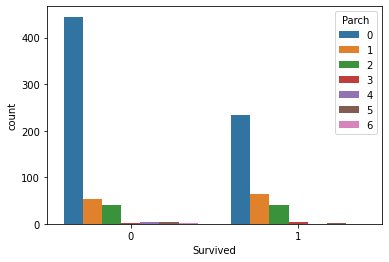

In [1176]:
#Soru 13
#Yalnız insanlar daha çok ölmüş
sns.countplot(df['Survived'],hue =df['Parch']) 

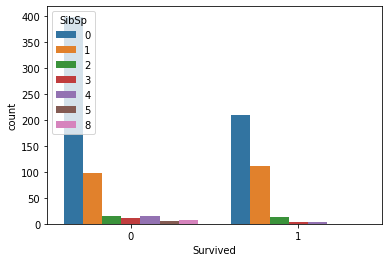

In [1177]:
#Soru 13
#Yalnız insanlar daha çok ölmüş
sns.countplot(df['Survived'],hue =df['SibSp']) 

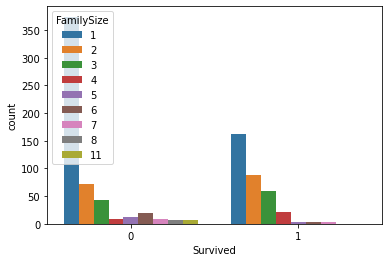

In [1178]:
#Soru 13
#Aile mevcudu azaldıkça veya olmadıkça ölüm sayısı artmış
sns.countplot(df['Survived'],hue =df['FamilySize']) 

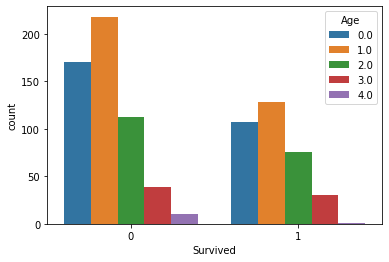

In [1179]:
#Soru 13
#Yaşayan yaşlı sayısı çok az
#Ölüm sayısı sağ sayısından fazla
sns.countplot(df['Survived'],hue =df['Age']) 

In [1180]:
#Soru 13
#Yaş ortalaması ve sınıf düzeyi düştükçe yaşam olasılığının da düşmüş olabileceğini düşündüğümden bu iki veriyle bir veri sütunu oluşturdum.
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3.0,1.0,3
1,2.0,2.0,1
2,3.0,1.0,3
3,2.0,2.0,1
4,6.0,2.0,3
5,0.0,0.0,3
6,3.0,3.0,1
7,0.0,0.0,3
8,3.0,1.0,3
9,0.0,0.0,2


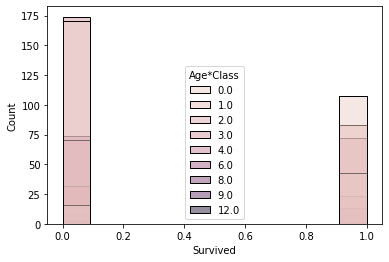

In [1181]:
#Soru 13
#Age*Class değeri büyüdükçe ölümler artmış
sns.histplot(x="Survived", hue='Age*Class',data=df);

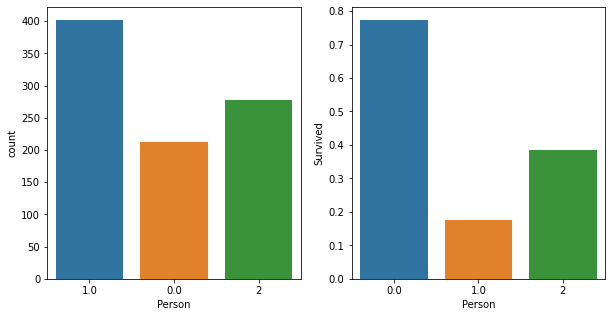

In [1182]:
#Soru 13
# Gemideki çocukların (yaş < ~16) Hayatta Kalma şansları yüksek görünüyor.
# Bu yüzden yolcuları erkek, kadın ve çocuk olarak sınıflandırabiliriz.
# Fonksiyon tanımladık.Bu fonksiyon eğer 16yaşından küçükse çocuk 
# Büyükse cinsiyete bakıcak
#1:Erkek,0=Kadın,2:Çocuk
def get_person(passenger):
    age,sex = passenger
    return '2' if age < 1 else sex
df['Person'] = df[['Age','Sex']].apply(get_person,axis=1)

# Kişi sütunu için yapay değişkenler oluşturdum.
person_dummies_titanic  = pd.get_dummies(df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']

#kendi veri setimizle orijinal veri setini birleştirdik.
df = df.join(person_dummies_titanic)
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
#Kadın-Erkek-Çocuk sayısı çizdirildi
sns.countplot(x='Person', data=df, ax=axis1)
#Kadın-Erkek-Çocuk Yaşam İhtimalleri çizdirildi
person_perc = df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2)




In [1183]:
#Soru 14
X = df.loc[:, ["Age*Class","Survived","Person","Fare"]]

In [1184]:
#Soru 14
from sklearn.cluster import KMeans
#K-means clustering 
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,Age*Class,Survived,Person,Fare,Cluster
0,3.0,0,1.0,7.2500,0
1,2.0,1,0.0,71.2833,3
2,3.0,1,0.0,7.9250,0
3,2.0,1,0.0,53.1000,3
4,6.0,0,1.0,8.0500,0


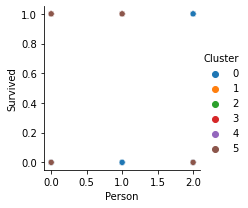

In [1185]:
#Soru 14
#Cinsiyet ve çocuk niteliklerine bakılarak ölüm-yaşam istatistikleri kümelendi.
sns.relplot(x="Person", y="Survived", hue="Cluster", data=X, height=3,);

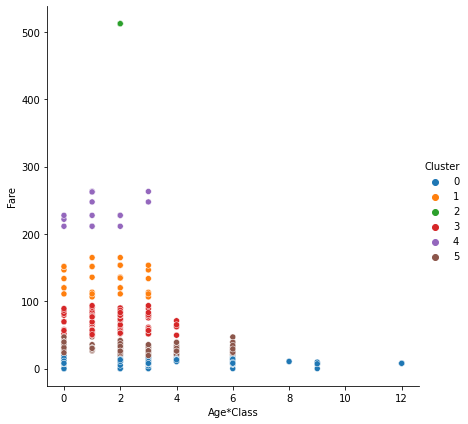

In [1186]:
#Soru 14
#Yaşam standartlarının sayısı arttıkça düştüğü Age*Class değerine ve ücrete bakılarak kümeleme işlemi grafiği çizdirildi.
sns.relplot( x="Age*Class", y="Fare", hue="Cluster", data=X, height=6,);

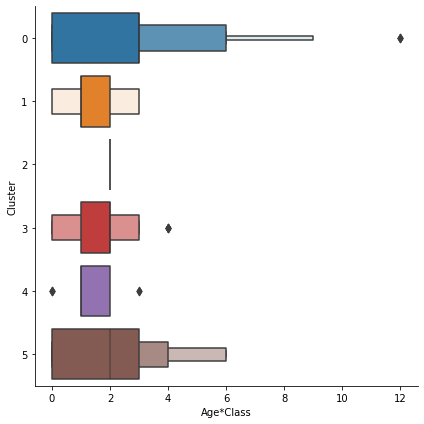

In [1187]:
#Soru 14
X["Age*Class"] = df["Age*Class"]
sns.catplot(x="Age*Class", y="Cluster", data=X, kind="boxen", height=6);

In [1188]:
#Soru 15
df2 = ["Age*Class","FamilySize","AgeGroup","Survived"]
X = df.copy()
y = X.pop('Fare')
X = X.loc[:, df2]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [1189]:
#Soru 15
from sklearn.decomposition import PCA

# principal components oluşturuldu
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# dataframe'e çevrildi
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,0.442260,0.766832,0.060838,0.034419
1,0.430473,-1.416684,0.420155,-0.558165
2,0.628828,-1.401725,-0.196740,0.071177
3,0.134637,-1.333651,0.317122,-0.254014
4,1.897399,0.666294,-0.196207,0.740677


In [1190]:
#Soru 15
loadings = pd.DataFrame(
    pca.components_.T,  # devrik matrix yüklemesi
    columns=component_names,  # sütunlar ana bileşenlerdir
    index=X.columns,  # satırlar orijinal özelliklerdir
)
loadings

,PC1,PC2,PC3,PC4
Age*Class,0.686703,0.052212,0.158776,0.707463
FamilySize,-0.260791,0.150631,0.953157,0.028104
AgeGroup,0.665621,-0.186823,0.231821,-0.684328
Survived,-0.131820,-0.969372,0.111986,0.174360


In [1191]:
#Soru 15
def plot_variance(pca, width=8, dpi=100):
    # figure oluşturuldu
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
      # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Figure ayarlandı
    fig.set(figwidth=8, dpi=100)
    return axs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb184aab390>,
      dtype=object)

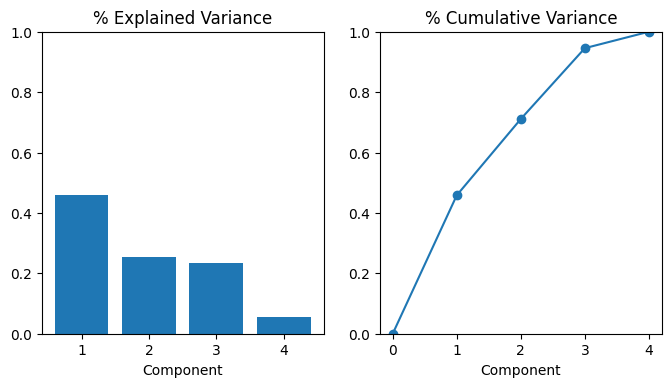

In [1192]:
#Soru 15
#explained variance gösterildi
plot_variance(pca)

In [1193]:
#Soru 15
#fonksiyon çağırıldı
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC4    0.725478
PC2    0.680409
PC1    0.678597
PC3    0.672761
Name: MI Scores, dtype: float64

In [1194]:
#Soru 15
# PC3'e göre sıralanmış veri çerçevesini gösterdim
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ["Sex", "Age*Class", "FamilySize", "Fare","Survived"]
df.loc[idx, cols]

,Sex,Age*Class,FamilySize,Fare,Survived
159,1,0.0,11,69.5500,0
846,1,0.0,11,69.5500,0
792,0,0.0,11,69.5500,0
201,1,0.0,11,69.5500,0
180,0,0.0,11,69.5500,0
...,...,...,...,...,...
168,1,0.0,1,25.9250,0
793,1,0.0,1,30.6958,0
790,1,0.0,1,7.7500,0
425,1,0.0,1,7.2500,0


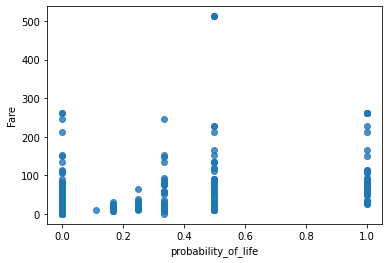

In [1195]:
#Soru 15
#Hayatta kalma olasılığı sınıf ve yaşa göre hesaplandı
df["probability_of_life"] = (X["Survived"] / X["Age*Class"])
sns.regplot(x="probability_of_life", y='Fare', data=df);

In [1196]:
#Soru 16
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [1197]:
#Soru 16
#x ve y değerlerini atadık. Verilerimizi test ve eğitim verisi olarak eğittik
#RandomForest kullandık
y = (df['Survived'])  
feature_names = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","FamilySize","AgeGroup"]
X = df[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)

Soru 17:
Eklentilerimiz için bazı yüklemeler yaptık.

In [1198]:
pip install --upgrade eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1199]:
#Soru 17
import eli5
from eli5.sklearn import PermutationImportance
#Permutation importance'ları hesaplandı
perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1435 ± 0.0170,Sex
0.0215 ± 0.0308,Pclass
0.0072 ± 0.0276,Embarked
0.0036 ± 0.0174,Age
0.0027 ± 0.0122,AgeGroup
-0.0027 ± 0.0091,Parch
-0.0108 ± 0.0193,Fare
-0.0161 ± 0.0091,SibSp
-0.0188 ± 0.0105,FamilySize


Soru 18:
Kütüphane için indirmeler yapıldı.

In [1200]:
pip install --upgrade shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1201]:
#Soru 18
row_to_show = 6
data_for_prediction = val_X.iloc[row_to_show]  # burada 1 satır veri kullandım. İstenirse birden fazla satır kullanılabilir.öylesine 6.satırı seçtik.
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
my_model.predict_proba(data_for_prediction_array)

array([[0.88666667, 0.11333333]])

In [1202]:
#Soru 18
import shap  # Shap değerlerini hesaplamak için kullanılan paket

# Shap değerlerini hesaplayabilen nesne oluşturuldu
explainer = shap.TreeExplainer(my_model)

# Shap değerlerini hesapladım
shap_values = explainer.shap_values(data_for_prediction)

In [1203]:
#Soru 18
#Shap values'ları yorumlarsak kırmızı renkte olanlar prediction'ımızı arttırırken mavi olanlar azaltmıştır diyebiliriz.
#Arttıran değerler çok olmasa da SibSp,Pclass, FamilySize,PArch olarak vardır.
#Bunlar arasında en çok arttıran ise Parch=2 olduğudur.Yani aile bağı olan(ebeveyn-çocuk)insanları temsil eder.
#Sonrasında en çok arttıran FamilySize'dır.Bu ise aile büyüklüğüne temsil eder.Kendsiisnden hariç 2 kişi daha ailesinde bulunan insanlardır.
#Artışı sağlayan bir diğer değişken ise Pclass'ın 2 değerine eşit olduğu halidir.Orta sınıf insanları temsil eder.
#Son olarak en az artışı sağlayan  SibSp'dir.Bu veri kardeş,karı-koca ilişkisi olmayanları temsil eder.
#prediction'da en çok düşüş yaratan cinsiyet(Sex)dir.Erkek cinsiyetli olanlar prediction'ı düşürmüştür.
#Sonrasında en çok AgeGroup=6 olanlar yani yaşlı kesimden olanlar prediction'ı düşürmüştür.
#Bir diğer düşüren Age=2 olanlardır.Yani 32-48 yaş aralığındaki insanlardır.
#Son olarak ise ücreti 26 olanlardır.
#Bu değerler sonrasında bizim best_value 'muz 0.11 olarak kendini göstermiştir.

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [1204]:
#Soru 19
#Aile bağları zayıfladıkça,aile boyutu küçüldükçe ölüm oranları arttığı düşüncesine göre kişi yalnızlaştıkça ölüm oranı artmalı
#Yalnızlığa bağlı bir özellik oluşturdum.
combine=[df]
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [1205]:
#Soru 19
df = df.drop(['Person','Child','Female','Male','probability_of_life'], axis=1)


In [1206]:
#Soru 19
A = df.copy()
B = A.pop("Survived")

# Kategoriler için etiket kodlaması yaptık
for colname in A.select_dtypes("object"):
    A[colname], _ = A[colname].factorize()

# Tüm ayrık özellikler tamsayı türlerine sahip olmalıdır
discrete_features = A.dtypes == int
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,AgeGroup,Age*Class,IsAlone
0,0,3,1,1.0,1,0,7.2500,3,2,4.0,3.0,0
1,1,1,0,2.0,1,0,71.2833,1,2,6.0,2.0,0
2,1,3,0,1.0,0,0,7.9250,3,1,5.0,3.0,1
3,1,1,0,2.0,1,0,53.1000,3,2,5.0,2.0,0
4,0,3,1,2.0,0,0,8.0500,3,1,5.0,6.0,1


In [1207]:
#Soru 19
#fonksiyon çağrıldı
mi_scores1 = make_mi_scores(A, B, discrete_features)
print(mi_scores1)


Sex           0.172346
Fare          0.125918
Pclass        0.065548
Age*Class     0.050634
SibSp         0.047077
FamilySize    0.043654
Embarked      0.021067
Parch         0.012619
AgeGroup      0.003612
IsAlone       0.002259
Age           0.000000
Name: MI Scores, dtype: float64


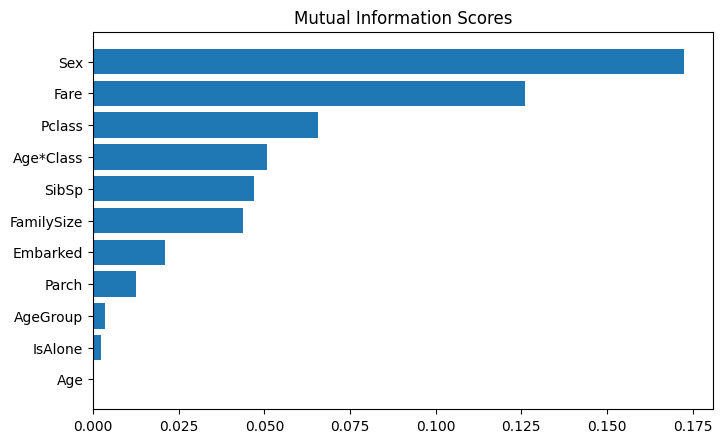

In [1208]:
#Soru 19
#Mutual Informantion Scores çizdirildi
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores1)

Soru 20:
Data Leakage endişesi yaşayabilirim çünkü elde ettiğim değerler biribirine bağlı olarak değişebilen değerler. Bazı değişkenleri 4 işlem sayesinde bazılarını gruplama ile elde ettim.Bazı verilerimi test ve eğitim datası olarak böldüm ve işleme aldım.Gözden kaçırdığım bir nokta bana data leakage sıkıntısı yaşatabilir.Ancak işlemlerim sonucundan gerçeküstü sonuçlar elde etmemiş olmam bana bu konuda güven veriyor.

Data Leakage 2 çeşittir.

**1:target leakage:**

target leakage, tahmincileriniz, tahminde bulunduğunuz sırada mevcut olmayacak verileri içerdiğinde meydana gelir. target leakage için yalnızca bir özellik için iyi tahminler yapılmasına yardımcı olup olmadığı değil, verilerin kullanılabilir hale geldiği zamanlama veya kronolojik sıra açısından düşünmek önemlidir.
Kimin zatüre olacağını tahmin etmek istediğinizi hayal edin.


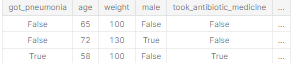


İnsanlar zatüre olduktan sonra iyileşmek için antibiyotik ilaçlar alırlar. Ham veriler bu sütunlar arasında güçlü bir ilişki olduğunu gösterir, ancak got_pneumonia değeri belirlendikten sonra take_antibiotic_medicine sıklıkla değiştirilir.

Model, take_antibiotic_medicine için False değerine sahip olan birinin zatüre olmadığını görecektir. Doğrulama verileri eğitim verileriyle aynı kaynaktan geldiğinden, model doğrulamada kendini tekrar edecek ve model büyük doğrulama (veya çapraz doğrulama) puanlarına sahip olacaktır.

Ancak, gerçek dünyaya sonradan yerleştirildiğinde model çok yanlış olacaktır, çünkü zatüre olacak hastalar bile, gelecekteki sağlıkları hakkında tahminlerde bulunmamız gerektiğinde henüz antibiyotik almış olmayacaklardır.

**2:train-test contamination:**
Eğitim verilerini doğrulama verilerinden ayırmaya dikkat etmediğinizde farklı bir sızıntı türü oluşur.

Doğrulama verileri ön işleme davranışını etkiliyorsa, bu işlemi ince yöntemlerle bozabilirsiniz. Buna bazen train-test contamination denir.

Örneğin, train_test_split() işlevini çağırmadan önce ön işlemeyi (eksik değerler için bir imputer takmak gibi) çalıştırdığınızı hayal edin. Sonuç olarak modeliniz iyi doğrulama puanları alarak size büyük bir güven verebilir, ancak karar vermek için onu dağıttığınızda düşük performans gösterebilir.



In [1209]:
#Soru 21
#Pipeline yarattık
#RandomForestta pipeline'gösterdik
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# "Cardinality" means the number of unique values in a column
# Nispeten düşük Cardinality'e(bir sütundaki benzersiz değerlerin sayısı) sahip kategorik sütunlar seçildi
categorical_cols = [cname for cname in train_X.columns if train_X[cname].nunique() < 10 and 
                        train_X[cname].dtype == "object"]

# Sayısal sütunları seçtik
numerical_cols = [cname for cname in train_X.columns if train_X[cname].dtype in ['int64', 'float64']]

# Yalnızca seçili sütunları tuttuk
my_cols = categorical_cols + numerical_cols
train_X = train_X[my_cols].copy()
val_X = val_X[my_cols].copy()

# Sayısal veriler için ön işleme
numerical_transformer = SimpleImputer(strategy='constant')

# Kategorik veriler için ön işleme
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Sayısal ve kategorik veriler için paket ön işleme
preprocessor = ColumnTransformer(
    transformers=[ ('num', numerical_transformer, numerical_cols),('cat', categorical_transformer, categorical_cols) ])
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)
from sklearn.metrics import mean_absolute_error

# Bir pipeline'da paket ön işleme ve modelleme kodu
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Eğitim verilerinin ön işlenmesi, uygun model
my_pipeline.fit(train_X,train_y)

# Doğrulama verilerinin ön işlenmesi, tahminlerin alınması
preds = my_pipeline.predict(val_X)

score = mean_absolute_error(val_y, preds)
print('MAE:', score)

MAE: 0.369039876087737


In [1210]:
#Soru 22
#decision tree pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeRegressor
#max_leaf_nodes'u değiştirmek için fonk yazdık
def get_score2(max_leaf_nodes): 
  numerical_transformer = SimpleImputer(strategy='constant')
  #Kategorik veriler için ön işleme
  categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])
  # Sayısal ve kategorik veriler için paket ön işleme
  preprocessor = ColumnTransformer( transformers=[('num', numerical_transformer, numerical_cols), ('cat', categorical_transformer, categorical_cols) ])
  steps=[('preprocessor', preprocessor),('dt', DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0))  ]#modelimizi ve bilgilerimizi verdik
  model=Pipeline(steps)
  #cross validation 
  scores2 = -1 * cross_val_score(model, X, y,cv=5, scoring='neg_mean_absolute_error')
  return scores2.mean()#'cv=5'in ortalaması

In [1211]:
#Soru 22
#farklı parametre değerleri için döngü
results1= {}
for i in range (1,9):
   results1[i*50] = get_score2(i*50)#fonksiyon çağırıldı

In [1212]:
results1

{50: 0.3532931088887496,
 100: 0.3501386942956016,
 150: 0.34282718651621286,
 200: 0.33706292207816735,
 250: 0.33893478532013466,
 300: 0.33893478532013466,
 350: 0.33893478532013466,
 400: 0.33893478532013466}

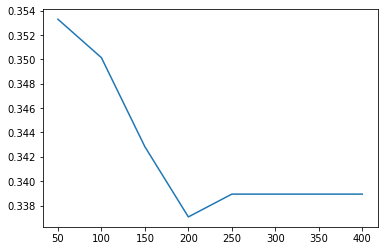

In [1213]:
#Soru 22
#en iyi değer veren parametreyi bulmak için grafik çizdirdik
#ve bu soruda en iyi değeri veren 200'dür.
plt.plot(list(results1.keys()),list(results1.values()))
plt.show()

In [1214]:
#Soru 23
#random forest pipeline
from sklearn.ensemble import RandomForestRegressor 
#n_estimators'u değiştirmek için fonk yazdık
def get_score(n_estimators): 
# Sayısal veriler için ön işleme
     numerical_transformer = SimpleImputer(strategy='constant')
     #Kategorik veriler için ön işleme
     categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])
     # Sayısal ve kategorik veriler için paket ön işleme
     preprocessor = ColumnTransformer( transformers=[('num', numerical_transformer, numerical_cols), ('cat', categorical_transformer, categorical_cols) ])
    # create a regressor object
     regressor = RandomForestRegressor (n_estimators,random_state=0) 
    # pipeline'da paket ön işleme ve modelleme kodu
     my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', regressor) ])
     #Cross validation
     scores = -1 * cross_val_score(my_pipeline, X, y,cv=5, scoring='neg_mean_absolute_error')
     return scores.mean()#'cv=5'in ortalaması


In [1215]:
#Soru 23
#en iyi değer veren parametreyi bulmak için grafik çizdirdik
#ve bu soruda en iyi değeri veren 50'dir.
results= {}
for i in range (1,9):
   results[i*50] = get_score(i*50)

In [1216]:
results

{50: 0.3530723306973864,
 100: 0.3534192834836685,
 150: 0.35351381590404796,
 200: 0.35370867974354564,
 250: 0.35349635771091836,
 300: 0.3535883181434094,
 350: 0.35337963365811453,
 400: 0.35368472814627405}

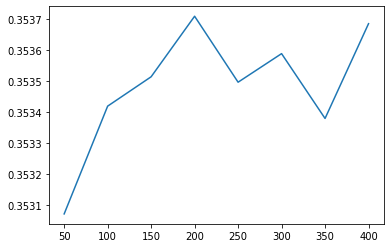

In [1217]:
#Soru 23
plt.plot(list(results.keys()),list(results.values()))
plt.show()

In [1218]:
#Soru 24
#xgboost pipeline
from xgboost import XGBRegressor


In [1219]:
#Soru 24
#n_estimators'u değiştirmek için fonk yazdık
def get_score3(n_estimators): 
  # pipeline'da paket ön işleme ve modelleme kodu
  steps2=[('dt',XGBRegressor(n_estimators=n_estimators, learning_rate=0.05, n_jobs=4) ) ]
  model2=Pipeline(steps2)
  scores3 = -1 * cross_val_score(model2, X, y,cv=5, scoring='neg_mean_absolute_error')
  return scores3.mean()

In [1220]:
#Soru 24
import warnings
warnings.filterwarnings("ignore")  # not defterini uyarılarla spam göndermesin diye yazdım ancak devam ediyor.
#Araştırdım ve Xgboost'un sürüm kaynaklı hatasından oluşuyormuş.Çözüm için colab'a ait bir bilgi bulamadım.
results2= {}
#farklı parametre denemek için döngü
for i in range (1,9):
   results2[i*50] = get_score3(i*50)

[15:11:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [1221]:
results2

{50: 0.2934065664166613,
 100: 0.27357772906919364,
 150: 0.26879753169161286,
 200: 0.26599877563549384,
 250: 0.2641790927461024,
 300: 0.26314218661148486,
 350: 0.2622298697476543,
 400: 0.26176109216107873}

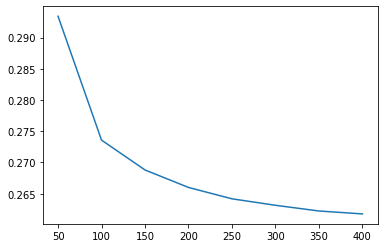

In [1222]:
#Soru 24
#en iyi sonuç veren parametreyi bulmak için grafik çizdirdik
#burada en iyi sonuç veren 400'dür
plt.plot(list(results2.keys()),list(results2.values()))
plt.show()

**Soru 25:**
Denediğim pipelinelar arasında DesicionTreede en iyi olan DesicionTree_4'tür.
RandomForest'ta RandomForest_1'dir.
Xg_boost'ta Xg_boost_9'dur.
Çünkü mae değerlerine baktığımızda en düşük hata skorları bu değerlerde oluşmaktadır.

**Soru 26:** Denediğim modeller arasında en düşük hata payına sahip olan genel olarak Xgboost olarak gözüküyor.Bu yüzden en iyi sonuca bu model ile erişebileceğimi düşünüyorum.Ancak sürüm kaynaklı hataları sebebiyle birtakım şüpheler uyandırabiliyor.Bu sebeple 2.plan olarak da DesicionTree'yi kullanabilirim.